<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Asset_allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd


In [9]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.4 MB/s eta 0:00:00


In [4]:
import quantstats as qs

In [5]:
ASSETS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
n_assets = len(ASSETS)



In [9]:
prices_df = yf.download(ASSETS,
                        start="2020-01-01",
                        end="2023-11-30")


[*********************100%%**********************]  5 of 5 completed


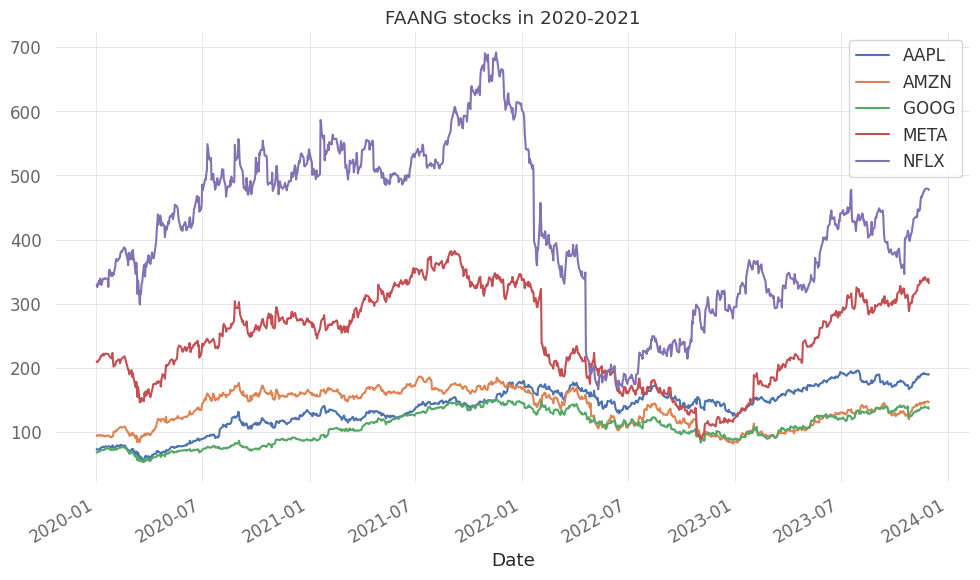

In [10]:
prices_df["Adj Close"].plot(title="FAANG stocks in 2020-2021")

sns.despine()
plt.tight_layout()

In [11]:
returns = prices_df["Adj Close"].pct_change().dropna()

In [12]:
portfolio_weights = n_assets * [1 / n_assets]


In [13]:
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns.T),
    index=returns.index
)

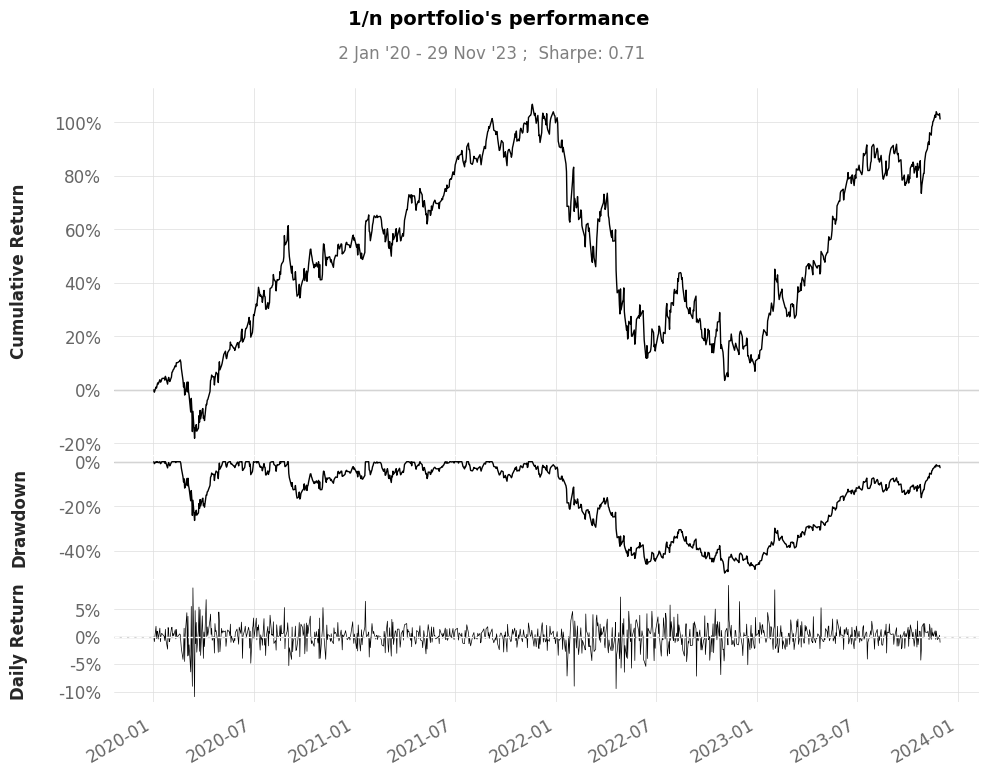

In [14]:
qs.plots.snapshot(portfolio_returns,
                  title="1/n portfolio's performance",
                  grayscale=True)

In [15]:
qs.reports.metrics(portfolio_returns,
                   benchmark="SPY",
                   mode="basic")

[*********************100%%**********************]  1 of 1 completed
                    Benchmark (SPY)    Strategy
------------------  -----------------  ----------
Start Period        2020-01-03         2020-01-03
End Period          2023-11-29         2023-11-29
Risk-Free Rate      0.0%               0.0%
Time in Market      100.0%             100.0%

Cumulative Return   41.0%              103.03%
CAGR﹪              6.26%              13.33%

Sharpe              0.5                0.72
Prob. Sharpe Ratio  83.58%             91.98%
Sortino             0.69               1.01
Sortino/√2          0.49               0.71
Omega               1.13               1.13

Max Drawdown        -34.1%             -49.94%
Longest DD Days     695                738

Gain/Pain Ratio     0.1                0.13
Gain/Pain (1M)      0.5                0.86

Payoff Ratio        0.9                0.88
Profit Factor       1.1                1.13
Common Sense Ratio  1.03               1.07
CPC Index     

In [16]:
qs.extend_pandas()

In [17]:
print(f"Sharpe ratio: {portfolio_returns.sharpe():.2f}")
print(f"Sortino ratio: {portfolio_returns.sortino():.2f}")

Sharpe ratio: 0.71
Sortino ratio: 1.00


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option('mode.chained_assignment', None)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

ImportError: ignored

In [18]:
[method for method in dir(qs.stats) if method[0] != "_"]

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

[*********************100%%**********************]  1 of 1 completed


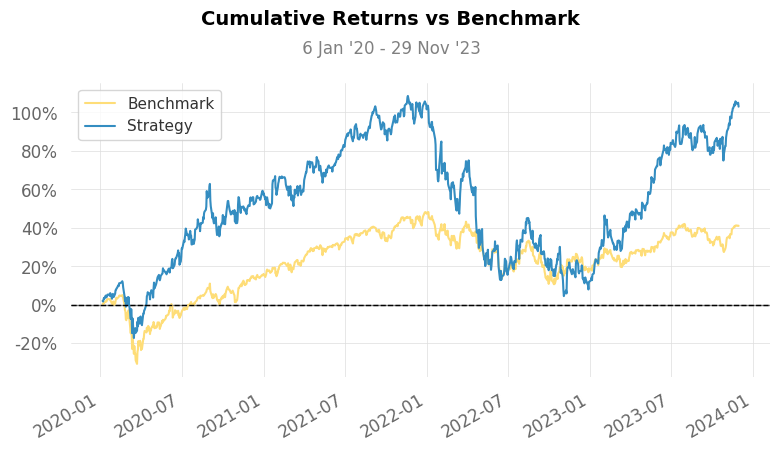

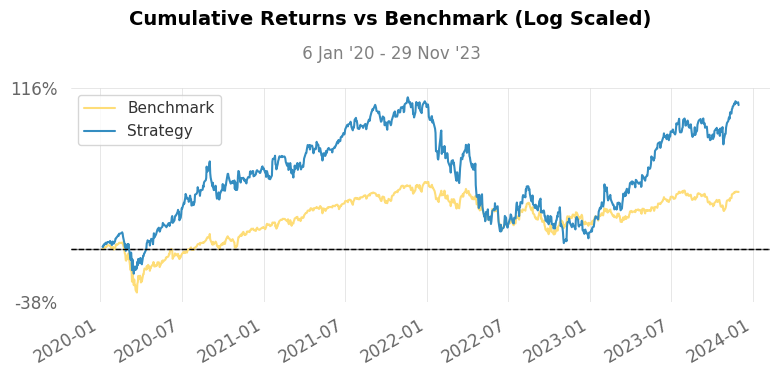

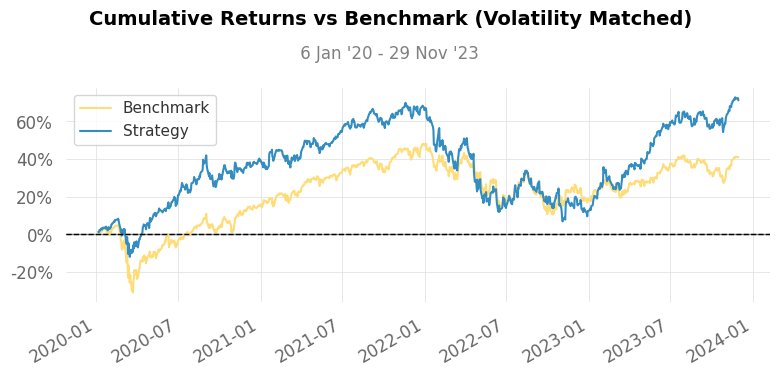

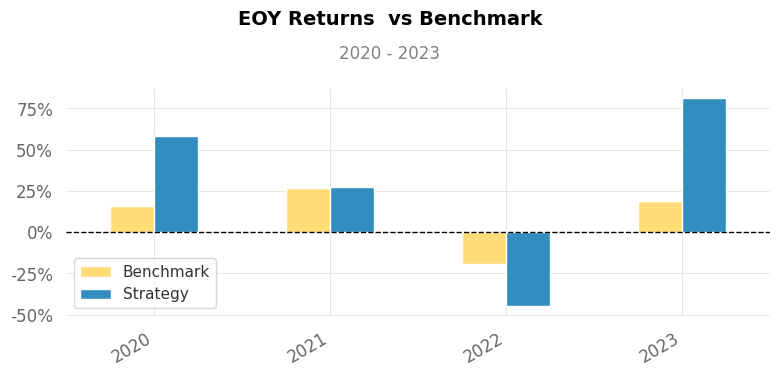

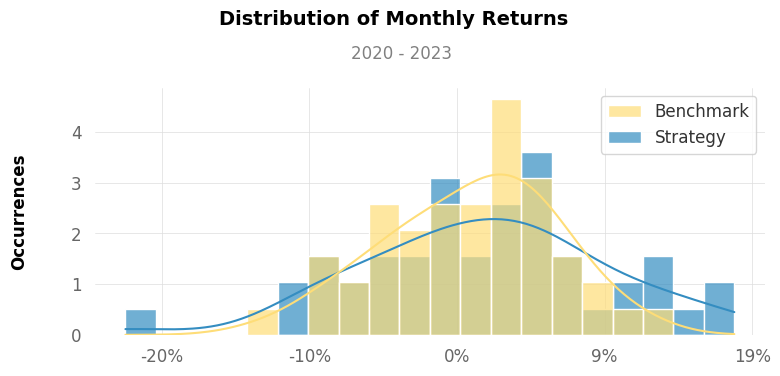

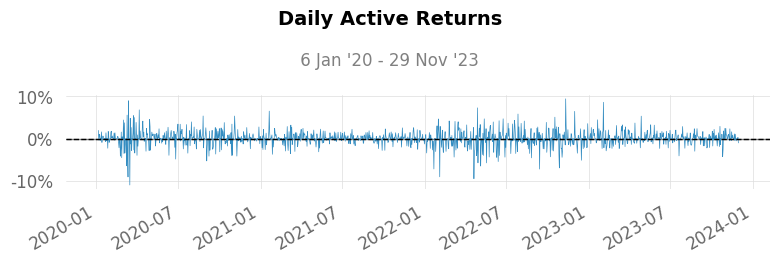

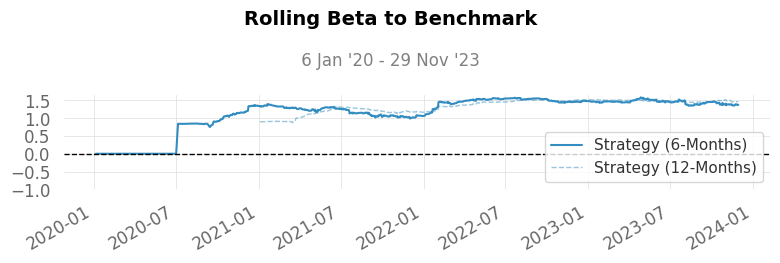

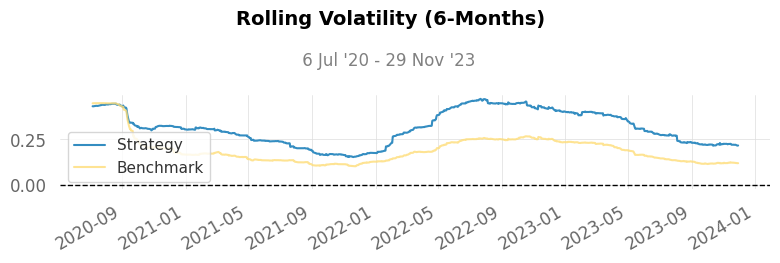

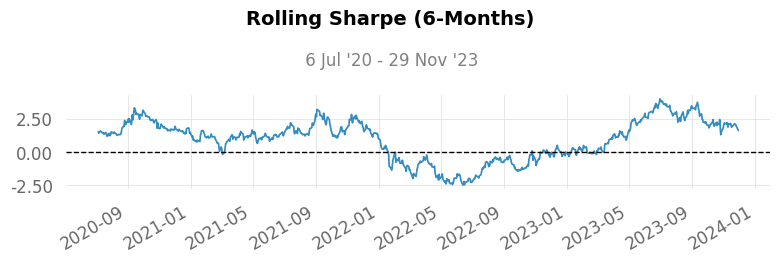

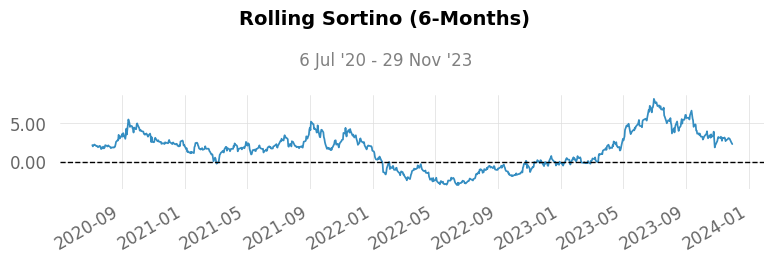

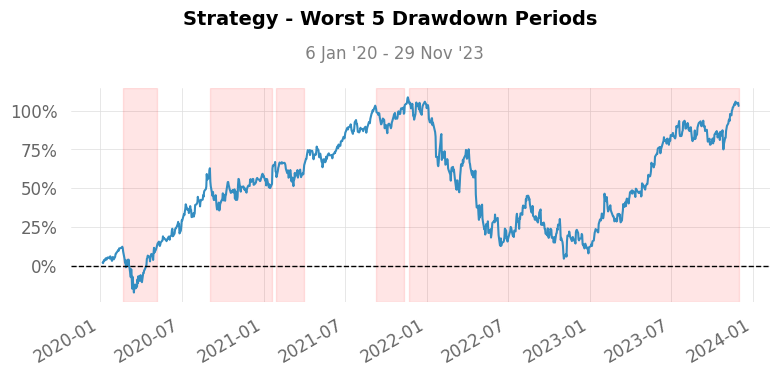

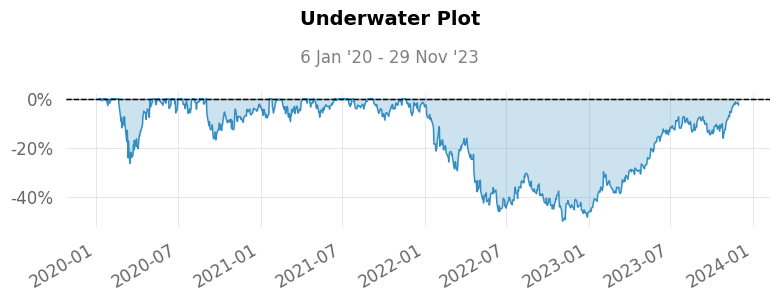

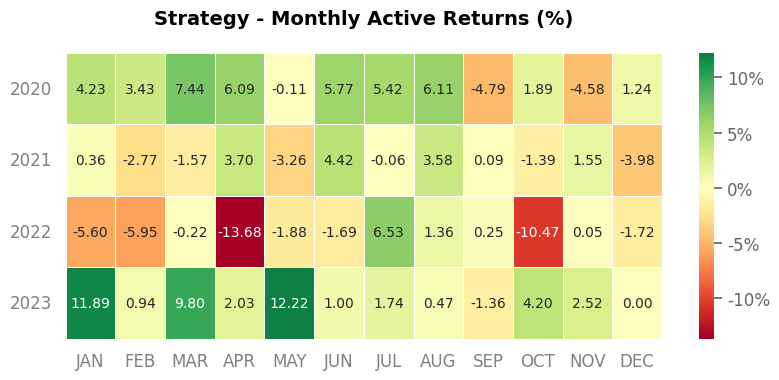

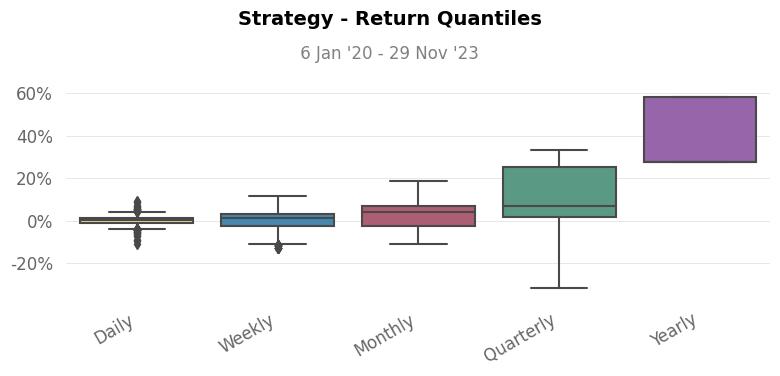

In [20]:
qs.reports.plots(portfolio_returns, benchmark="SPY", mode="full", prepare_returns=False)

In [21]:
#Finding the efficient frontier using Monte Carlo simulations
import yfinance as yf
import numpy as np
import pandas as pd

In [27]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
ASSETS = ["META", "TSLA", "AMZN", "MSFT"]
ASSETS.sort()

n_assets = len(ASSETS)

In [28]:
prices_df = yf.download(ASSETS,
                        start="2021-01-01",
                        end="2023-11-30")

[*********************100%%**********************]  4 of 4 completed


In [29]:
prices_df.head()

Adj Close                                           Close  \
                  AMZN        META        MSFT        TSLA        AMZN   
Date                                                                     
2021-01-04  159.331497  268.940002  211.996628  243.256668  159.331497   
2021-01-05  160.925507  270.970001  212.201111  245.036667  160.925507   
2021-01-06  156.919006  263.309998  206.698883  251.993332  156.919006   
2021-01-07  158.108002  268.739990  212.580933  272.013336  158.108002   
2021-01-08  159.134995  267.570007  213.876160  293.339996  159.134995   

                                                      High              ...  \
                  META        MSFT        TSLA        AMZN        META  ...   
Date                                                                    ...   
2021-01-04  268.940002  217.690002  243.256668  163.600006  275.000000  ...   
2021-01-05  270.970001  217.899994  245.036667  161.169006  272.399994  ...   
2021-01-06  263.309998  212.250000  251.993332  159.875504  267.750000  ...   
2021-01-07  268.739990  218.289993  272.013336  160.427002  271.609985  ...   
2021-01-08  267.570007  219.619995  293.339996  159.531998  268.950012  ...   

                   Low                    Open                          \
                  MSFT        TSLA        AMZN        META        MSFT   
Date                                                                     
2021-01-04  214.809998  239.063339  163.500000  274.779999  222.529999   
2021-01-05  215.699997  239.733337  158.300507  268.290009  217.259995   
2021-01-06  211.940002  249.699997  157.324005  262.000000  212.169998   
2021-01-07  213.710007  258.399994  157.850006  265.899994  214.039993   
2021-01-08  217.029999  279.463318  159.000000  268.309998  218.679993   

                          Volume                                 
                  TSLA      AMZN      META      MSFT       TSLA  
Date                                                             
2021-01-04  239.820007  88228000  15106100  37130100  145914600  
2021-01-05  241.220001  53110000   9871600  23823000   96735600  
2021-01-06  252.830002  87896000  24354100  35930700  134100000  
2021-01-07  259.209991  70290000  15789800  27694500  154496700  
2021-01-08  285.333344  70754000  18528300  22956200  225166500  

[5 rows x 24 columns]

In [30]:
prices_df.tail()

Adj Close                                           Close  \
                  AMZN        META        MSFT        TSLA        AMZN   
Date                                                                     
2023-11-22  146.710007  341.489990  377.850006  234.210007  146.710007   
2023-11-24  146.740005  338.230011  377.429993  235.449997  146.740005   
2023-11-27  147.729996  334.700012  378.609985  236.080002  147.729996   
2023-11-28  147.029999  338.989990  382.700012  246.720001  147.029999   
2023-11-29  146.320007  332.200012  378.850006  244.139999  146.320007   

                                                      High              ...  \
                  META        MSFT        TSLA        AMZN        META  ...   
Date                                                                    ...   
2023-11-22  341.489990  377.850006  234.210007  147.740005  342.920013  ...   
2023-11-24  338.230011  377.429993  235.449997  147.199997  341.859985  ...   
2023-11-27  334.700012  378.609985  236.080002  149.259995  339.899994  ...   
2023-11-28  338.989990  382.700012  246.720001  147.600006  339.380005  ...   
2023-11-29  332.200012  378.850006  244.139999  148.539993  339.899994  ...   

                   Low                    Open                          \
                  MSFT        TSLA        AMZN        META        MSFT   
Date                                                                     
2023-11-22  374.970001  231.399994  144.570007  339.209991  378.000000   
2023-11-24  375.140015  232.330002  146.699997  340.130005  377.329987   
2023-11-27  376.200012  232.100006  147.529999  336.179993  376.779999   
2023-11-28  378.160004  234.009995  146.979996  333.399994  378.350006   
2023-11-29  377.440002  242.759995  147.850006  339.690002  383.760010   

                          Volume                                 
                  TSLA      AMZN      META      MSFT       TSLA  
Date                                                             
2023-11-22  242.039993  45669100  10702700  23345300  117950600  
2023-11-24  233.750000  22378400   5467500  10176600   65125200  
2023-11-27  236.889999  53762400  15684500  22179200  112031800  
2023-11-28  236.679993  42711700  12637200  20453100  148549900  
2023-11-29  249.210007  40610900  16024500  28963400  135401300  

[5 rows x 24 columns]

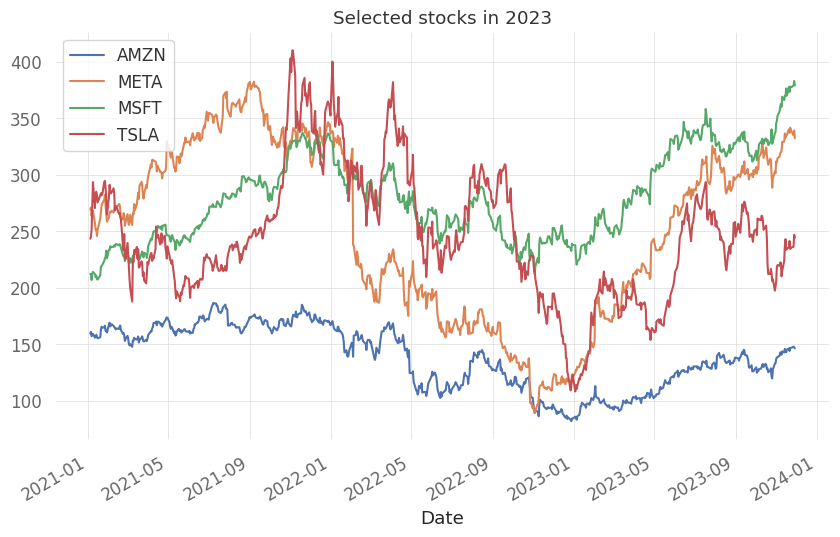

In [31]:
prices_df["Adj Close"].plot(title="Selected stocks in 2023");

In [32]:
returns_df = prices_df["Adj Close"].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

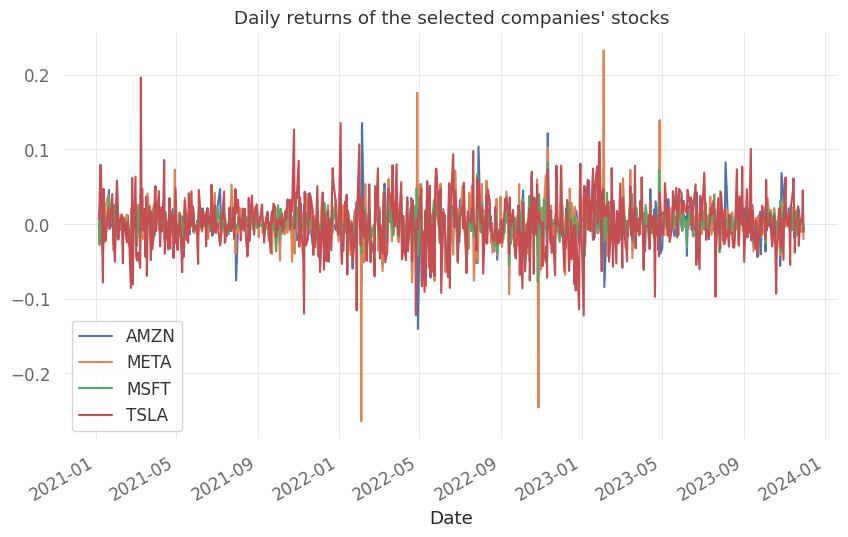

In [33]:
returns_df.plot(title="Daily returns of the selected companies' stocks");

In [34]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [35]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)

portf_sharpe_ratio = portf_rtns / portf_vol

In [36]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df

,returns,volatility,sharpe_ratio
0,0.179642,0.346544,0.518381
1,0.164932,0.475840,0.346613
2,0.146235,0.402750,0.363091
3,0.107267,0.342892,0.312831
4,0.172123,0.339230,0.507393
...,...,...,...
99995,0.196561,0.347154,0.566206
99996,0.151597,0.403553,0.375656
99997,0.169453,0.326312,0.519297
99998,0.161393,0.341752,0.472251


In [37]:
N_POINTS = 100

ef_rtn_list = []
ef_vol_list = []

possible_ef_rtns = np.linspace(
    portf_results_df["returns"].min(),
    portf_results_df["returns"].max(),
    N_POINTS
)
possible_ef_rtns = np.round(possible_ef_rtns, 2)
portf_rtns = np.round(portf_rtns, 2)

for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

In [38]:
#Plot the Efficient Frontier

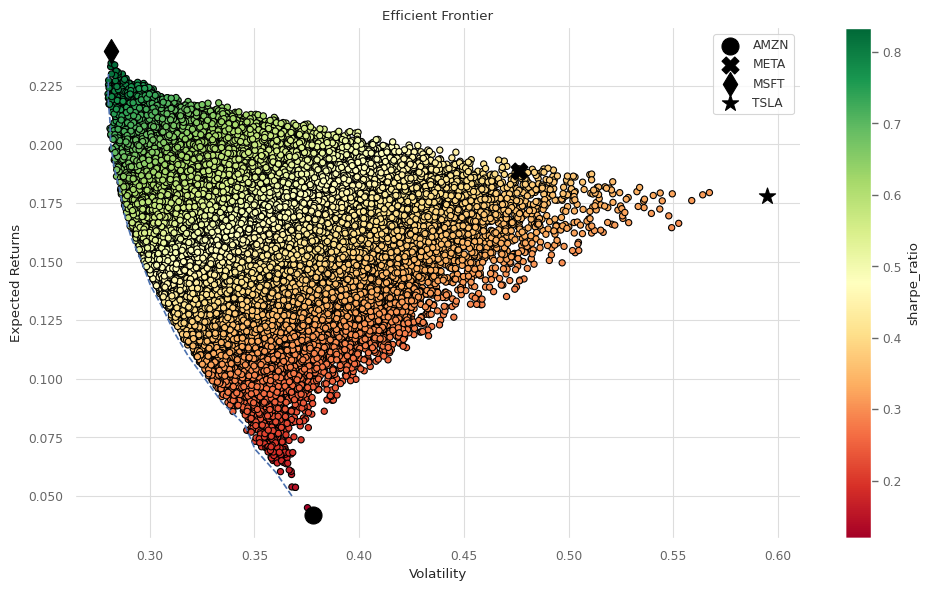

In [39]:
MARKERS = ["o", "X", "d", "*"]

with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(kind="scatter", x="volatility",
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black",
                          ax=ax)
    ax.set(xlabel="Volatility",
           ylabel="Expected Returns",
           title="Efficient Frontier")
    ax.plot(ef_vol_list, ef_rtn_list, "b--")
    for asset_index in range(n_assets):
        ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
                   y=avg_returns[asset_index],
                   marker=MARKERS[asset_index],
                   s=150, color="black",
                   label=ASSETS[asset_index])
    ax.legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_11_10", dpi=200)

In [12]:
import quantstats as qs


In [21]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('META')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

[*********************100%%**********************]  1 of 1 completed


0.6665348780748255

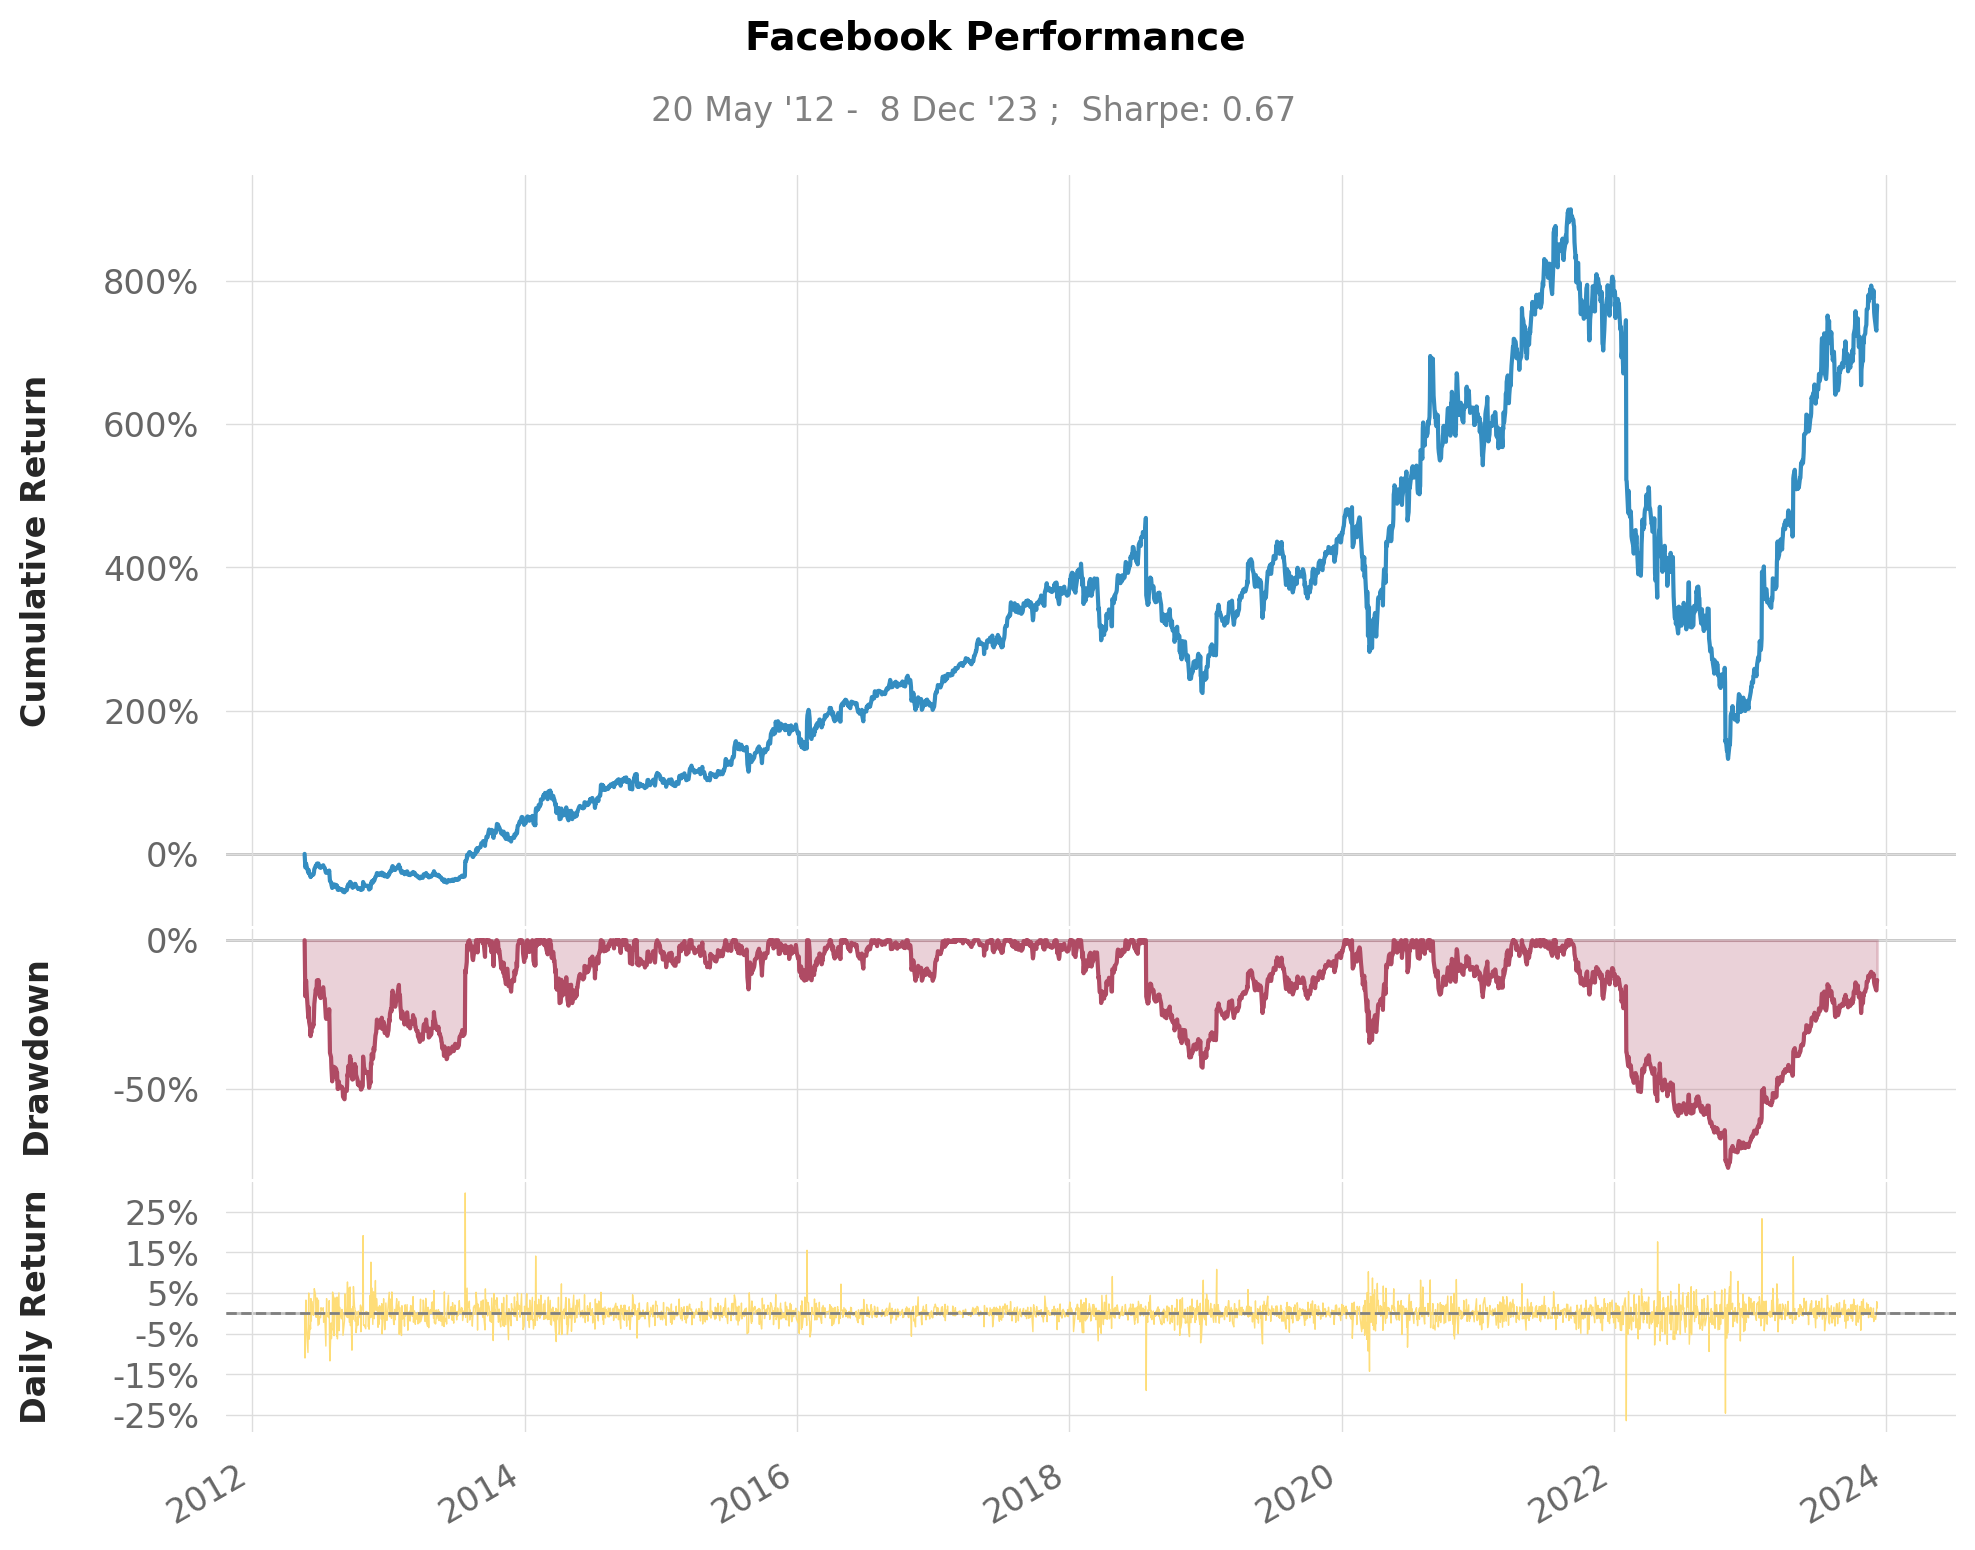

In [14]:
qs.plots.snapshot(stock, title='Facebook Performance', show=True)

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance', show=True)

In [24]:
#(benchmark can be a pandas Series or ticker)
qs.reports.html(stock, "SPY")

ValueError: ignored